<a href="https://colab.research.google.com/github/SiyuanChen726/BreastAgeNet/blob/main/vis_attention_heatmep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/SiyuanChen726/BreastAgeNet.git

Cloning into 'BreastAgeNet'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 273 (delta 54), reused 8 (delta 7), pack-reused 165 (from 1)
Receiving objects: 100% (273/273), 24.33 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [49]:
!apt-get update
!apt-get install -y openslide-tools libopenslide0
!pip install openslide-python

In [1]:
import os
import sys
sys.path.append('/content/BreastAgeNet')

import openslide
import h5py
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt


from utils_vis import *
from utils_train import *

In [ ]:
# Download the files with corrected Google Drive links
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1tDfFXZvB6PASPW-4OMrBU-HQo7optH53' -O 'BreastAgeNet_bestModel.pt'

# Download the first example
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1kjGkjayAs6MRs3o3KO6UNr7EJMwEUx3w' -O '17063839_FPE_3_bagFeature_UNI_reinhard.h5'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1z0oHogtFarQi9mCqrfz1A1Ri6eGflnUa' -O '17063839_FPE_3_patch_merge.csv'

# Download the second example
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=15ON96X0X63ugkBGRd0MNXxTxTAtQNeEb' -O '19001626_FPE_3_bagFeature_UNI_reinhard.h5'
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1wMti0yQGb_knIOtv79BxJyq0vtPvEYLw' -O '19001626_FPE_3_patch_merge.csv'

In [3]:
ckpt_name = "BreastAgeNet_bestModel.pt"
n_feats = get_dim_input(model_name = "UNI")

model = BreastAgeNet(n_feats, attention="MultiHeadAttention", n_classes=3, n_heads=8, n_latent=512, embed_attn=True)
model.load_state_dict(torch.load(ckpt_name))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cuda


<ipython-input-3-aa43e33e99df>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(ckpt_name))


In [4]:
patch_fea = "17063839_FPE_3_bagFeature_UNI_reinhard.h5"
patch_info = "17063839_FPE_3_patch_merge.csv"
df = get_WSIheatmap_df(model, patch_fea, patch_info)

100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


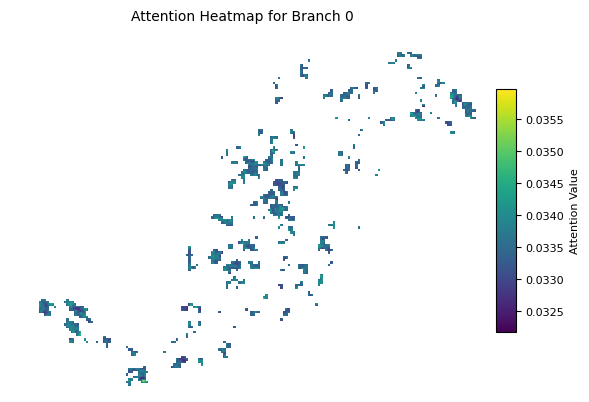

In [5]:
img = get_branch_attn(df, branch = 0)
show_WSI_attnMap(img, branch=0, vmin=None, vmax=None, save_path=None)

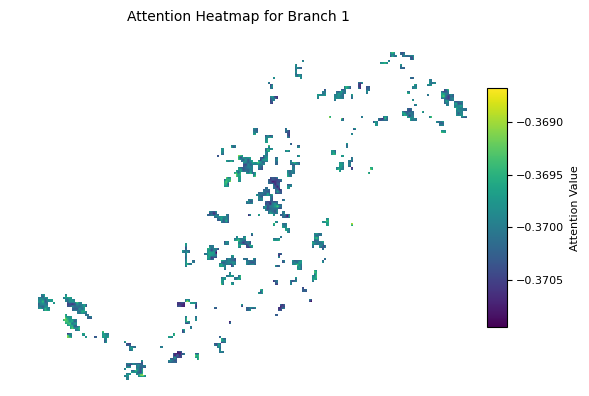

In [6]:
img = get_branch_attn(df, branch = 1)
show_WSI_attnMap(img, branch=1, vmin=None, vmax=None, save_path=None)

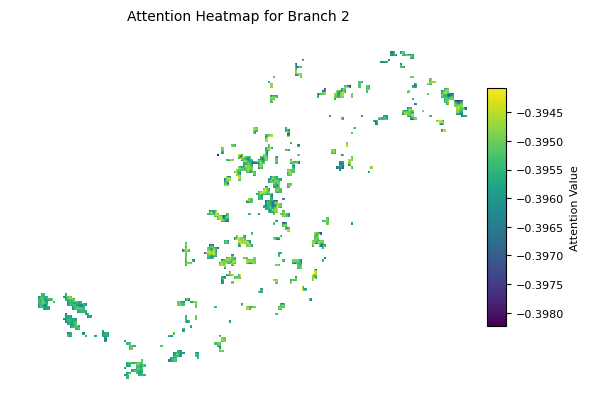

In [7]:
img = get_branch_attn(df, branch = 2)
show_WSI_attnMap(img, branch=2, vmin=None, vmax=None, save_path=None)

In [8]:
patch_fea = '19001626_FPE_3_bagFeature_UNI_reinhard.h5'
patch_info = '19001626_FPE_3_patch_merge.csv'
df = get_WSIheatmap_df(model, patch_fea, patch_info)

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


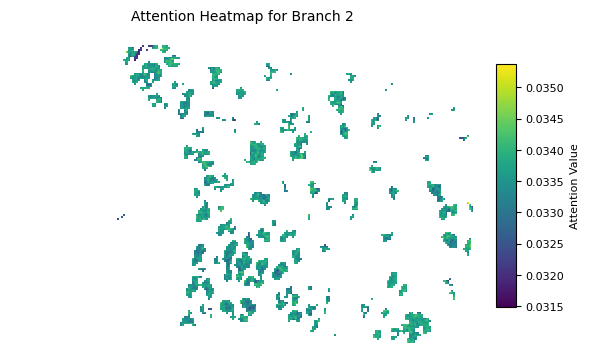

In [9]:
img = get_branch_attn(df, branch = 0)
show_WSI_attnMap(img, branch=2, vmin=None, vmax=None, save_path=None)

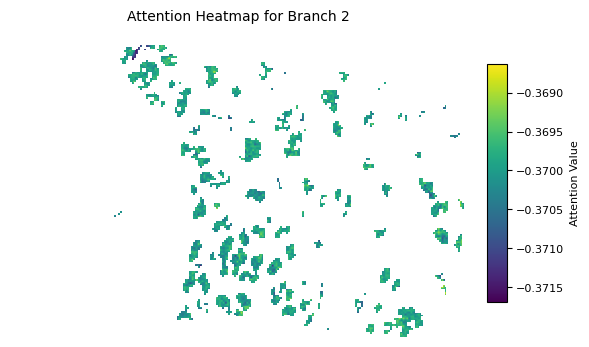

In [10]:
img = get_branch_attn(df, branch = 1)
show_WSI_attnMap(img, branch=2, vmin=None, vmax=None, save_path=None)

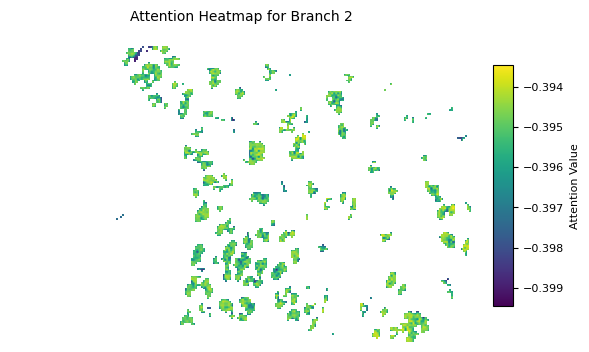

In [11]:
img = get_branch_attn(df, branch = 2)
show_WSI_attnMap(img, branch=2, vmin=None, vmax=None, save_path=None)